# Data mining the Gaia star archive
### Question: The Gaia database contains billions of stars. Using data mining techniques, identify groups of stars that belong together
Stars that formed from the same cloud, older clusters broke apart - more difficult to classify. Use unsupervised machine learning algorithms to classify star clusters.

Gaia archive: https://gea.esac.esa.int/archive/

Data explained: https://www.cosmos.esa.int/web/gaia/dr2

In [31]:
import pandas as pd
df = pd.read_csv("GaiaSource_000-020-110.csv")
stats = df.describe()
stats

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,l,b,ecl_lon,ecl_lat
count,1.705790e+05,1.705790e+05,1.705790e+05,170579.0,170579.000000,170579.000000,170579.000000,170579.000000,403.000000,403.000000,...,170579.000000,170579.000000,170579.000000,1.705790e+05,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000
mean,1.635378e+18,6.916184e+18,5.710462e+08,2015.0,314.445730,9.989248,-2.558527,5.915029,2.842900,0.633141,...,-4.029097,27.643187,57.872288,1.374082e+04,26.393011,18.201054,46.092700,-29.074272,316.145533,14.042220
std,0.000000e+00,7.824116e+14,3.303331e+08,0.0,1.494900,10.504467,0.971403,5.701347,3.065102,0.212730,...,28.123823,1.589400,15.012840,3.072943e+05,1058.442394,1.811302,1.441368,1.257351,1.575566,0.914638
min,1.635378e+18,6.914851e+18,1.177300e+04,2015.0,310.788140,0.148633,-4.775293,0.103670,-1.791382,0.224590,...,-59.998318,20.475262,11.000000,1.258887e+01,0.546064,6.296060,42.849223,-31.893663,312.234516,11.766862
25%,1.635378e+18,6.915492e+18,2.840771e+08,2015.0,313.376715,3.436794,-3.331537,1.383367,1.155185,0.460758,...,-24.187854,26.690452,48.000000,2.321637e+02,2.780138,17.234616,44.938345,-30.102178,315.080043,13.390512
50%,1.635378e+18,6.916201e+18,5.700315e+08,2015.0,314.614848,4.602855,-2.642237,4.267861,1.996829,0.638235,...,-3.065681,27.744164,59.000000,5.945685e+02,3.730346,18.589265,46.105692,-29.023634,316.303455,14.025367
75%,1.635378e+18,6.916868e+18,8.582401e+08,2015.0,315.537785,13.754998,-1.843954,9.027622,3.569003,0.817786,...,11.675235,28.743473,69.000000,2.070435e+03,6.488504,19.610284,47.280949,-28.089637,317.342888,14.697067
max,1.635378e+18,6.917529e+18,1.142677e+09,2015.0,317.798057,91.395674,-0.002570,84.366297,23.499923,0.994737,...,59.995136,35.308086,114.000000,4.914554e+07,308189.671077,22.774803,48.915665,-26.394036,319.488987,16.333882


In [32]:
df.head(5) #df[0:5]

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,1635378410781933568,6914851441950097280,644618244,2015.0,312.115755,3.956164,-3.740349,1.404508,NaN,NaN,...,28.036676,68,4444.580030,4.916518,16.405193,NOT_AVAILABLE,43.620180,-27.630762,313.504567,13.567278
1,1635378410781933568,6914851476309836160,668015830,2015.0,312.134332,4.045969,-3.739628,1.437343,NaN,NaN,...,28.035465,69,5137.131412,7.556112,16.247968,NOT_AVAILABLE,43.630971,-27.646661,313.523107,13.562885
2,1635378410781933568,6914851476309836800,609250353,2015.0,312.138582,25.938898,-3.737056,11.683244,NaN,NaN,...,23.329552,33,416.763565,3.129720,18.975046,NOT_AVAILABLE,43.635821,-27.649139,313.528028,13.564193
3,1635378410781933568,6914851476309838848,393393107,2015.0,312.131173,24.819271,-3.735257,11.175843,NaN,NaN,...,23.574673,31,353.162079,3.602725,19.154835,NOT_AVAILABLE,43.633581,-27.641793,313.521223,13.567953
4,1635378410781933568,6914851476309839872,241639886,2015.0,312.134676,23.953915,-3.733854,10.811309,NaN,NaN,...,23.329810,33,251.991138,3.906820,19.521307,NOT_AVAILABLE,43.636869,-27.644181,313.525077,13.568342


In [33]:
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 170579 samles.


In [34]:
cols = list(df)
print('Data contains {} columns'.format(len(cols)))

Data contains 57 columns


In [35]:
N = df.shape[0]
P = df.shape[1]

print('Data has {} rows, {} columns'.format(N, P))

Data has 170579 rows, 57 columns


In [36]:
df.dtypes #no spectra data

solution_id                        int64
source_id                          int64
random_index                       int64
ref_epoch                        float64
ra                               float64
ra_error                         float64
dec                              float64
dec_error                        float64
parallax                         float64
parallax_error                   float64
pmra                             float64
pmra_error                       float64
pmdec                            float64
pmdec_error                      float64
ra_dec_corr                      float64
ra_parallax_corr                 float64
ra_pmra_corr                     float64
ra_pmdec_corr                    float64
dec_parallax_corr                float64
dec_pmra_corr                    float64
dec_pmdec_corr                   float64
parallax_pmra_corr               float64
parallax_pmdec_corr              float64
pmra_pmdec_corr                  float64
astrometric_n_ob

# Below: 1 degree box
### RA: 10-11degree, DEC: 0-1
https://gea.esac.esa.int/archive/

Stellarium: 16-17 stars

Gaia: 2987 stars

SQL: SELECT * 
from gaiadr2.gaia_source 
where 
RA between 10 and 11 AND
DEC between 0 and 1


In [37]:
one_degree_box = pd.read_csv("1degree.csv")
one_degree_box.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
count,2.987000e+03,2.987000e+03,2.987000e+03,2987.0,2987.000000,2987.000000,2987.000000,2987.000000,2362.000000,2362.000000,...,401.000000,401.000000,401.000000,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,1.635721e+18,2.545348e+18,8.348150e+08,2015.5,10.493477,2.463617,0.497418,1.399731,1.118871,0.515015,...,0.145748,0.080983,0.232484,200111.0,1.146199,1.037363,1.228500,2.469787,2.134659,2.804914
std,0.000000e+00,2.906554e+15,4.872723e+08,0.0,0.294380,7.761182,0.289191,4.448988,1.631237,0.463866,...,0.164295,0.124251,0.199014,0.0,1.541179,1.378242,1.635531,13.575517,10.984913,16.270136
min,1.635721e+18,2.543035e+18,1.729800e+04,2015.5,10.000043,0.020369,0.000095,0.014438,-5.938072,0.022573,...,0.003000,0.000000,0.017100,200111.0,0.500944,0.348610,0.508067,0.030641,0.029643,0.031640
25%,1.635721e+18,2.543104e+18,4.181524e+08,2015.5,10.236596,0.167316,0.241739,0.111729,0.274800,0.138554,...,0.037000,0.006900,0.093100,200111.0,0.657643,0.589448,0.704749,0.188104,0.171484,0.201126
50%,1.635721e+18,2.543315e+18,8.389194e+08,2015.5,10.485396,0.496462,0.488284,0.357365,0.859963,0.382675,...,0.093000,0.032600,0.168300,200111.0,0.833459,0.757096,0.890149,0.466593,0.407986,0.532451
75%,1.635721e+18,2.549134e+18,1.255057e+09,2015.5,10.754713,1.217741,0.747516,0.866748,1.713874,0.760717,...,0.192300,0.107000,0.304600,200111.0,1.088864,1.017593,1.195962,1.154610,1.032632,1.304638
max,1.635721e+18,2.549394e+18,1.691948e+09,2015.5,10.999717,88.285228,0.999616,62.026589,28.199629,3.248399,...,1.065500,0.821900,1.213100,200111.0,19.346436,17.540230,20.250835,197.145390,145.256930,249.033840


In [38]:
N = len(one_degree_box)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 2987 samles.


In [39]:
data = one_degree_box[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'phot_g_mean_flux', 'phot_g_mean_mag']]

<function matplotlib.pyplot.show(*args, **kw)>

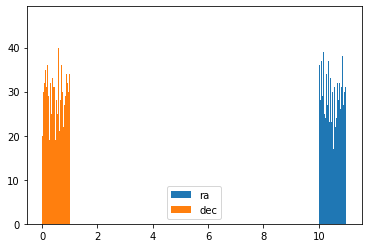

In [40]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data['ra'], label='ra', bins=100)
plt.hist(data['dec'], label='dec', bins=100)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

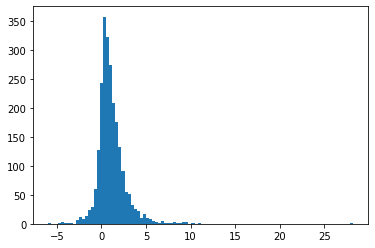

In [41]:
plt.hist(data['parallax'], bins=100)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

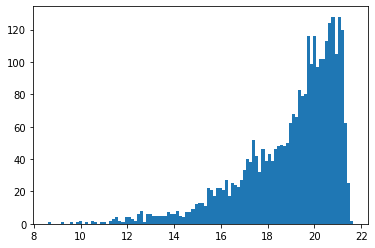

In [42]:
plt.hist(data['phot_g_mean_mag'], bins=100)
plt.show

## Find distance
distance = 1/parallax

Transverse velocity in right ascension: vTra(km/s) = pmra(arcsec/yr) * d * 4.740

Transverse velocity in declination: vTdec(km/s) = pmdec(arcsec/yr) * d * 4.740

#### parallax: 
- arcseconds or milliarcseconds
- apparent shift of position of any nearby star against the background of distant objects
- "Parallax uncertainties are in the range of up to 0.04 milliarcsecond for sources at G < 15, around 0.1 mas for sources with G=17 and at the faint end"

#### proper motion: 
- arcseconds per year or milliarcseconds per year
- angular velocity across the sky exhibited by a celestial body
- vR, the star's radial velocity
- pmra, the component of proper motion in right ascension, and
- pmdec, the component of proper motion in declination.

In [43]:
data.head(20)

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag
0,10.910672,0.153058,NaN,NaN,NaN,NaN,144.412272,20.289356
1,10.859938,0.153501,0.345412,0.723004,4.188321,-8.079128,188.297027,20.001257
2,10.901538,0.155252,-0.208778,0.893954,1.454527,-1.324278,120.151203,20.489046
3,10.683739,0.019205,0.382521,0.317710,-1.734745,-2.584722,521.258231,18.895733
4,10.636041,0.040811,NaN,NaN,NaN,NaN,90.379070,20.798197
5,10.713029,0.082916,NaN,NaN,NaN,NaN,87.414204,20.834412
6,10.610089,0.036868,4.141359,0.180118,58.473849,-26.433618,1171.855152,18.016180
7,10.852308,0.252707,NaN,NaN,NaN,NaN,469.598765,19.009048
8,10.822123,0.091510,NaN,NaN,NaN,NaN,105.246325,20.632849
9,10.833893,0.226309,-0.008680,0.535908,-1.973189,-0.573069,324.343102,19.410854


Questions:

What does it mean when parallax is negative?

How can parallax be greater than 1? If the closest star is >1pc away (so if parallax is > 1, the closest star would be <1pc away)